<a href="https://colab.research.google.com/github/Bordin-Lab/election-pelotas/blob/main/Arvore_de_Decis%C3%A3o_Elei%C3%A7%C3%A3o_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Tell me about this dataset.

Here is all the data you need:
"jamove - 2020.xlsx"

## Data loading

### Subtask:
Load the data from "jamove - 2020.xlsx" into a pandas DataFrame.


**Reasoning**:
Load the data from the excel file into a pandas DataFrame and display the first few rows and the shape of the DataFrame.



In [ ]:
import pandas as pd

try:
    df = pd.read_excel('jamove - 2020.xlsx')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'jamove - 2020.xlsx' not found. Please ensure the file exists in the current directory or provide the correct file path.")
except Exception as e:
    print(f"An error occurred: {e}")

,Candidatos,Doação CPF,Doação CNPJ,Doação Não-Original,Doação Desconhecida,Doação Total,Eleito,QE,Base Partidária,Gênero
0,ADALIM LUIZ GARCIA MEDEIROS,25300.0,3900.0,0.0,0,29200.0,0,32.095238,2,1
1,ADEMAR FERNANDES DE ORNEL,10100.0,6600.0,0.0,0,16700.0,1,52.476190,2,1
2,ADIR MARTIRENE DIAS,150.0,225.0,704.5,0,1079.5,0,4.571429,2,1
3,ADRIANE FONSECA GONÇALVES,0.0,1510.0,3704.5,0,5214.5,0,14.380952,2,0
4,AÍSHA DE MORAES SCHAUN,0.0,0.0,12521.0,0,12521.0,0,15.476190,2,0


(350, 10)


## Data preparation

### Subtask:
Prepare the data for model training.


**Reasoning**:
Handle missing values, convert data types, and explore one-hot encoding for categorical features.



In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in numerical columns with the mean
numerical_cols = ['Doação CPF', 'Doação CNPJ', 'Doação Não-Original', 'Doação Desconhecida', 'Doação Total', 'QE']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

# Convert 'Eleito' and 'Gênero' to categorical
df['Eleito'] = df['Eleito'].astype('category')
df['Gênero'] = df['Gênero'].astype('category')

# Convert 'Base Partidária' to categorical if it's not already
if not pd.api.types.is_categorical_dtype(df['Base Partidária']):
    df['Base Partidária'] = df['Base Partidária'].astype('category')

# One-hot encode 'Base Partidária' and 'Gênero'
df = pd.get_dummies(df, columns=['Base Partidária', 'Gênero'], prefix=['Base', 'Genero'])

# Display the updated DataFrame
display(df.head())
print(df.info())

Candidatos             0
Doação CPF             0
Doação CNPJ            0
Doação Não-Original    0
Doação Desconhecida    0
Doação Total           0
Eleito                 0
QE                     0
Base Partidária        0
Gênero                 0
dtype: int64


<ipython-input-2-e94aa019e65a>:14: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df['Base Partidária']):


,Candidatos,Doação CPF,Doação CNPJ,Doação Não-Original,Doação Desconhecida,Doação Total,Eleito,QE,Base_1,Base_2,Base_3,Genero_0,Genero_1
0,ADALIM LUIZ GARCIA MEDEIROS,25300.0,3900.0,0.0,0,29200.0,0,32.095238,False,True,False,False,True
1,ADEMAR FERNANDES DE ORNEL,10100.0,6600.0,0.0,0,16700.0,1,52.476190,False,True,False,False,True
2,ADIR MARTIRENE DIAS,150.0,225.0,704.5,0,1079.5,0,4.571429,False,True,False,False,True
3,ADRIANE FONSECA GONÇALVES,0.0,1510.0,3704.5,0,5214.5,0,14.380952,False,True,False,True,False
4,AÍSHA DE MORAES SCHAUN,0.0,0.0,12521.0,0,12521.0,0,15.476190,False,True,False,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Candidatos           350 non-null    object  
 1   Doação CPF           350 non-null    float64 
 2   Doação CNPJ          350 non-null    float64 
 3   Doação Não-Original  350 non-null    float64 
 4   Doação Desconhecida  350 non-null    int64   
 5   Doação Total         350 non-null    float64 
 6   Eleito               350 non-null    category
 7   QE                   350 non-null    float64 
 8   Base_1               350 non-null    bool    
 9   Base_2               350 non-null    bool    
 10  Base_3               350 non-null    bool    
 11  Genero_0             350 non-null    bool    
 12  Genero_1             350 non-null    bool    
dtypes: bool(5), category(1), float64(5), int64(1), object(1)
memory usage: 21.4+ KB
None


## Feature engineering

### Subtask:
Feature Engineering


**Reasoning**:
Create new features based on existing donation columns to potentially improve the predictive power of a decision tree model.  Specifically, create ratios and sums of donation types.



In [ ]:
# Create new features
df['Doacao_CPF_Ratio'] = df['Doação CPF'] / df['Doação Total']
df['Doacao_CNPJ_Ratio'] = df['Doação CNPJ'] / df['Doação Total']
df['Doacao_Nao_Original_Ratio'] = df['Doação Não-Original'] / df['Doação Total']
df['Doacao_Desconhecida_Ratio'] = df['Doação Desconhecida'] / df['Doação Total']
df['Total_Doacao_Conhecida'] = df['Doação CPF'] + df['Doação CNPJ'] + df['Doação Não-Original']


# Handle potential division by zero errors
df.replace([float('inf'), float('-inf')], 0, inplace=True)
df.fillna(0, inplace=True)


display(df.head())

,Candidatos,Doação CPF,Doação CNPJ,Doação Não-Original,Doação Desconhecida,Doação Total,Eleito,QE,Base_1,Base_2,Base_3,Genero_0,Genero_1,Doacao_CPF_Ratio,Doacao_CNPJ_Ratio,Doacao_Nao_Original_Ratio,Doacao_Desconhecida_Ratio,Total_Doacao_Conhecida
0,ADALIM LUIZ GARCIA MEDEIROS,25300.0,3900.0,0.0,0,29200.0,0,32.095238,False,True,False,False,True,0.866438,0.133562,0.000000,0.0,29200.0
1,ADEMAR FERNANDES DE ORNEL,10100.0,6600.0,0.0,0,16700.0,1,52.476190,False,True,False,False,True,0.604790,0.395210,0.000000,0.0,16700.0
2,ADIR MARTIRENE DIAS,150.0,225.0,704.5,0,1079.5,0,4.571429,False,True,False,False,True,0.138953,0.208430,0.652617,0.0,1079.5
3,ADRIANE FONSECA GONÇALVES,0.0,1510.0,3704.5,0,5214.5,0,14.380952,False,True,False,True,False,0.000000,0.289577,0.710423,0.0,5214.5
4,AÍSHA DE MORAES SCHAUN,0.0,0.0,12521.0,0,12521.0,0,15.476190,False,True,False,True,False,0.000000,0.000000,1.000000,0.0,12521.0


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets as per the instructions.



In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('Eleito', axis=1)
y = df['Eleito']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (280, 17)
X_test shape: (70, 17)
y_train shape: (280,)
y_test shape: (70,)


## Model training

### Subtask:
Train a decision tree model.


**Reasoning**:
Train a decision tree model using the prepared training data.



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train.drop('Candidatos', axis=1), y_train)

DecisionTreeClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the decision tree model.


**Reasoning**:
Predict the target variable using the trained model and evaluate its performance using various metrics.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict the target variable
y_pred = dt_model.predict(X_test.drop('Candidatos', axis=1))

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Generate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9285714285714286
Precision: 0.6
Recall: 0.5
F1-score: 0.5454545454545454
Confusion Matrix:
[[62  2]
 [ 3  3]]


## Summary:

### Data Analysis Key Findings

*   The dataset contains 350 rows and 10 columns, including information about candidates, various types of donations, election results, and demographic details.
*   There were no missing values in the numerical columns used for analysis.
*   New features were engineered based on the ratios of different donation types to the total donation and the sum of known donation types.
*   The dataset was split into training (80%) and testing (20%) sets.
*   A Decision Tree Classifier was trained and evaluated, achieving an accuracy of 0.929, a precision of 0.6, a recall of 0.5, and an F1-score of 0.545 on the test set.
*   The confusion matrix shows 62 true negatives, 3 true positives, 2 false positives, and 3 false negatives.

### Insights or Next Steps

*   The model's high accuracy is influenced by a potential class imbalance, as indicated by the lower precision, recall, and F1-score for the positive class.
*   Further investigation into the class distribution and exploring techniques to address class imbalance (e.g., resampling, using different evaluation metrics, or trying different models) could improve the model's ability to correctly identify the positive class.


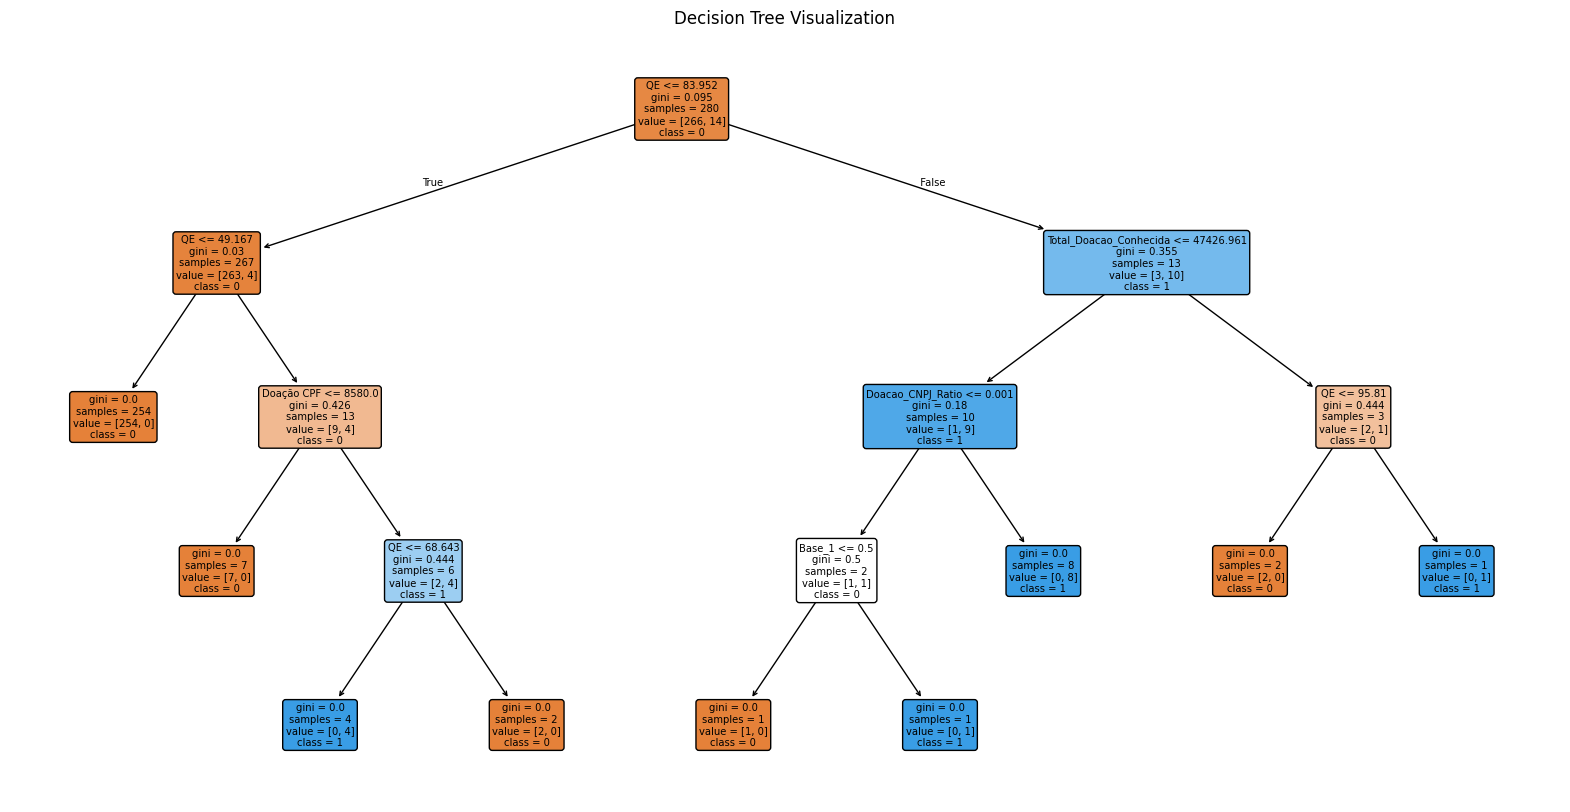

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X_train.drop('Candidatos', axis=1).columns,
          class_names=[str(cls) for cls in dt_model.classes_],
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

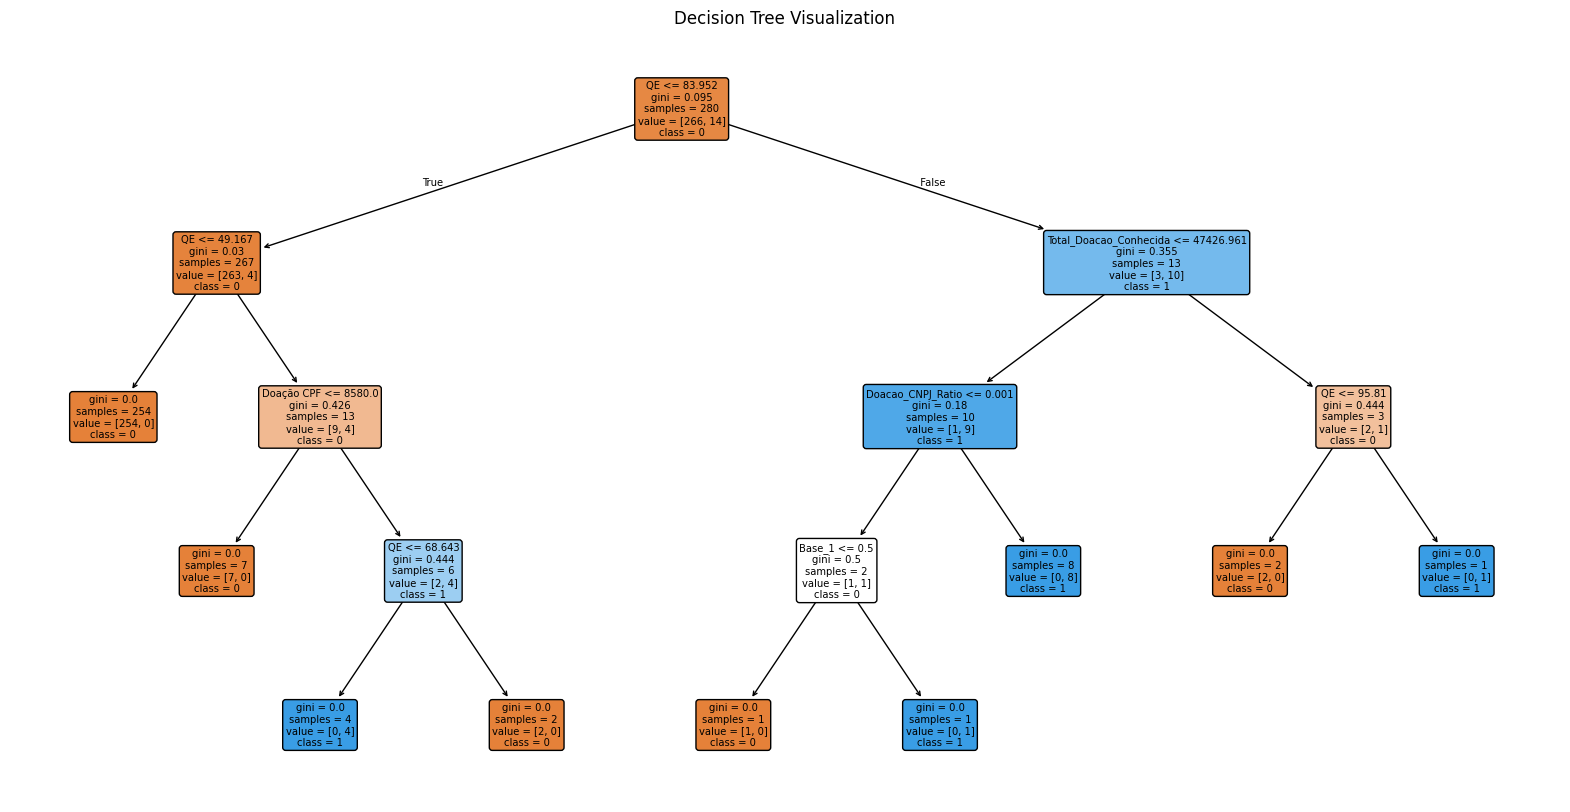

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X_train.drop('Candidatos', axis=1).columns,
          class_names=[str(cls) for cls in dt_model.classes_], # This labels the classes
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()